#Problem for Covid - 19 Data Analysis Project using Python

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Dataset link :  
Url = https://raw.githubusercontent.com/SR1608/Datasets/main/coviddata.csv

1. Import the dataset using Pandas from above mentioned url.

In [3]:
url = "https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv"
df = pd.read_csv(url)

2. High Level Data Understanding

In [11]:
# a. Find no. of rows & columns in the dataset
print("Number of rows and columns:", df.shape)

Number of rows and columns: (57394, 49)


In [12]:
# b. Data types of columns
print("\nData types of columns:\n", df.dtypes)


Data types of columns:
 iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_ic

In [13]:
# c. Info & describe of data in dataframe
print("\nDataframe Info:\n", df.info())
print("\nDataframe Describe:\n", df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57394 entries, 0 to 57393
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            57071 non-null  object 
 1   continent                           56748 non-null  object 
 2   location                            57394 non-null  object 
 3   date                                57394 non-null  object 
 4   total_cases                         53758 non-null  float64
 5   new_cases                           56465 non-null  float64
 6   new_cases_smoothed                  55652 non-null  float64
 7   total_deaths                        44368 non-null  float64
 8   new_deaths                          56465 non-null  float64
 9   new_deaths_smoothed                 55652 non-null  float64
 10  total_cases_per_million             53471 non-null  float64
 11  new_cases_per_million               56401

3. Low Level Data Understanding:

In [15]:
# a. Find count of unique values in location column
print("\nCount of unique values in 'location' column:", df['location'].nunique())


Count of unique values in 'location' column: 216


In [16]:
# b. Find which continent has maximum frequency using value counts
max_continent = df['continent'].value_counts().idxmax()
print("\nContinent with maximum frequency:", max_continent)


Continent with maximum frequency: Europe


In [17]:
# c. Find maximum & mean value in 'total_cases'
max_total_cases = df['total_cases'].max()
mean_total_cases = df['total_cases'].mean()
print("\nMaximum total cases:", max_total_cases)
print("Mean total cases:", mean_total_cases)


Maximum total cases: 55154651.0
Mean total cases: 167797.3688753302


In [21]:
# d. Find 25%, 50%, and 75% quartile value in 'total_deaths'
quartiles_total_deaths = df['total_deaths'].quantile([0.25, 0.50, 0.75])
print("\nQuartile values for 'total_deaths':\n", quartiles_total_deaths)


Quartile values for 'total_deaths':
 0.25     13.0
0.50     84.0
0.75    727.0
Name: total_deaths, dtype: float64


In [19]:
# e. Find which continent has maximum 'human_development_index'
max_hdi_continent = df.loc[df['human_development_index'].idxmax()]['continent']
print("\nContinent with maximum 'human_development_index':", max_hdi_continent)


Continent with maximum 'human_development_index': Europe


In [20]:
# f. Find which continent has minimum 'gdp_per_capita'
min_gdp_continent = df.loc[df['gdp_per_capita'].idxmin()]['continent']
print("Continent with minimum 'gdp_per_capita':", min_gdp_continent)

Continent with minimum 'gdp_per_capita': Africa


4. Filter the dataframe with only this columns ['continent', 'location', 'date', 'total_cases', 'total_deaths', 'gdp_per_capita', 'human_development_index'] and update the data frame.

In [22]:
selected_columns = ['continent', 'location', 'date', 'total_cases', 'total_deaths', 'gdp_per_capita', 'human_development_index']
df_filtered = df[selected_columns]

5. Data Cleaning

In [27]:
# a. Remove duplicates
df_filtered = df_filtered.drop_duplicates()

# b. Find missing values
missing_values = df_filtered.isnull().sum()
print("\nMissing values in columns:\n", missing_values)

# c. Remove observations with missing continent values
df_filtered = df_filtered.dropna(subset=['continent'])

# d. Fill missing values with 0
df_filtered = df_filtered.fillna(0)


Missing values in columns:
 continent                  0
location                   0
date                       0
total_cases                0
total_deaths               0
gdp_per_capita             0
human_development_index    0
month                      0
dtype: int64


6. Date time format

In [26]:
# a. Convert date column to datetime format
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

# b. Create new column 'month'
df_filtered['month'] = df_filtered['date'].dt.month

7. Data Aggregation

In [29]:
# a. Find max value in all columns using groupby function on 'continent' column
df_groupby = df.groupby('continent').max().reset_index()

# b. Display the resulting dataframe 'df_groupby'
print("\nDataframe after aggregation:\n", df_groupby)



Dataframe after aggregation:
        continent iso_code                      location      date  \
0         Africa      ZWE                      Zimbabwe  31/12/19   
1           Asia      YEM                         Yemen  31/12/19   
2         Europe      VAT                       Vatican  31/12/19   
3  North America      VIR  United States Virgin Islands  31/12/19   
4        Oceania      WLF             Wallis and Futuna  31/12/19   
5  South America      VEN                     Venezuela  31/12/19   

   total_cases  new_cases  new_cases_smoothed  total_deaths  new_deaths  \
0     752269.0    13944.0           12583.714       20314.0       572.0   
1    8874290.0    97894.0           93198.571      130519.0      2003.0   
2    1991233.0    86852.0           54868.571       52147.0      2004.0   
3   11205486.0   184813.0          156419.143      247220.0      4928.0   
4      27750.0     1384.0             551.714         907.0        59.0   
5    5876464.0    69074.0          

8. Feature Engineering

In [30]:
# a. Create a new feature 'total_deaths_to_total_cases' by ratio of 'total_deaths' column to 'total_cases'
df_groupby['total_deaths_to_total_cases'] = df_groupby['total_deaths'] / df_groupby['total_cases']

9. Data Visualization

In [ ]:
# a. Perform Univariate analysis on 'gdp_per_capita' column by plotting histogram using seaborn dist plot.
sns.distplot(df_groupby['gdp_per_capita'], kde=False)
plt.title('Histogram of GDP per Capita')
plt.show()

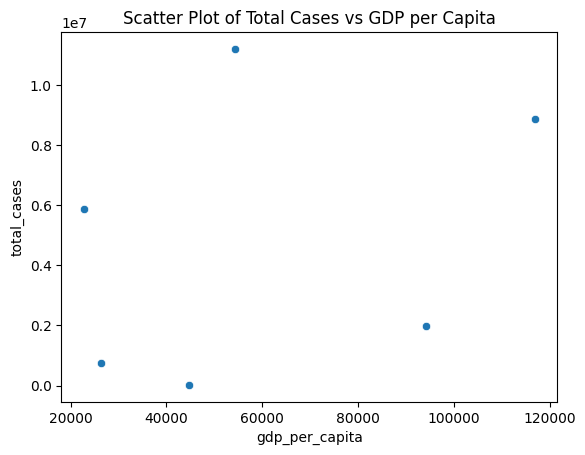

In [32]:
# b. Scatter plot of 'total_cases' & 'gdp_per_capita'
sns.scatterplot(x='gdp_per_capita', y='total_cases', data=df_groupby)
plt.title('Scatter Plot of Total Cases vs GDP per Capita')
plt.show()

In [ ]:
# c. Pairplot on df_groupby dataset
sns.pairplot(df_groupby)
plt.suptitle('Pairplot of df_groupby Dataset')
plt.show()

In [ ]:
# d. Bar plot of 'continent' column with 'total_cases'
sns.catplot(x='continent', y='total_cases', kind='bar', data=df_groupby)
plt.title('Bar Plot of Total Cases by Continent')
plt.show()

10. Save the df_groupby dataframe in your local drive using pandas.to_csv         function .

In [ ]:
df_groupby.to_csv('df_groupby.csv', index=False)